In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np

# Read Data

In [3]:
df=pd.read_csv('MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
df=df.dropna()
print('Shape of Data',df.shape)
df.head()


Shape of Data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


<AxesSubplot:xlabel='DATE'>

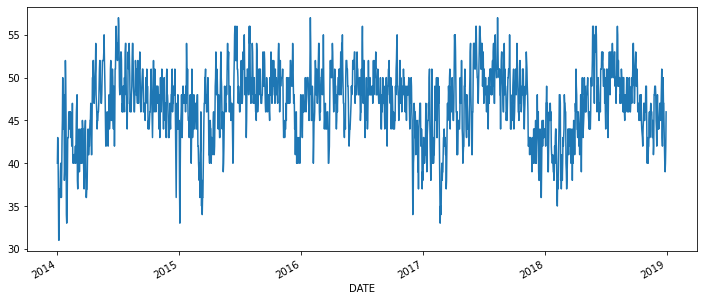

In [5]:
df['AvgTemp'].plot(figsize=(12,5))

#### P-VALLUE SHOULD BE LESS THAN 0.05 THEEN it is STATIONARY smaller the better
0.8,0.5 NOT STATIONARY

In [6]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print("1. ADF :",dftest[0])
    print("2. P-value :",dftest[1])
    print("3. Num of Lags :",dftest[2])
    print("4. Num of observations used for ADF regression and critical values calculation:",dftest[3])
    print("5. Critical Values :")
    
    for key,val in dftest[4].items():
        print("\t",key,":",val)
        

In [7]:
ad_test(df['AvgTemp'])

1. ADF : -6.554680125068781
2. P-value : 8.67593748019951e-09
3. Num of Lags : 12
4. Num of observations used for ADF regression and critical values calculation: 1808
5. Critical Values :
	 1% : -3.433972018026501
	 5% : -2.8631399192826676
	 10% : -2.5676217442756872


#### Figure Out Order For ARIMA Model

In [9]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
stepwise_fit=auto_arima(df['AvgTemp'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.743, Time=1.86 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.55 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.267, Time=2.29 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.968, Time=2.72 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=2.36 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.713, Time=2.48 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.019, Time=2.85 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.653, Time=2.79 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.749, Time=3.34 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.742
Date:                Thu, 29 Jun 2023   AIC                           8295.485
Time:                        16:43:00   BIC                           8339.542
Sample:                             0   HQIC                          8311.739
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3091      0.383      3.420      0.001       0.559       2.059
ar.L1          0.9718      0.008    117.853      0.000       0.956       0.988
ma.L1         -0.1240      0.024     -5.229      0.000      -0.170      -0.078
ma.L2         -0.2160      0.024     -8.952      0.000      -0.263      -0.169
ma.L3         -0.2050      0.024     -8.602      0.000      -0.252      -0.158
ma.L4         -0.1374      0.023     -6.061      0.000      -0.182      -0.093
ma.L5         -0.0466      0.024     -1.921      0.055      -0.094       0.001
sigma2         5.4651      0.170     32.141      0.000       5.132       5.798
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.99
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
from statsmodels.tsa.arima.model import ARIMA

#### Split Data into Training and Testing


In [16]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


#### Train The Model

In [17]:
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Thu, 29 Jun 2023   AIC                           8156.395
Time:                        17:01:16   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Make Predictions on Test Set

In [20]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
pred.index=df.index[start:end+1]
print(pred)

DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721546
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894467
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923892
2018-12-12    45.933419
2018-12-13    45.942809
2018-12-14    45.952064
2018-12-15    45.961185
2018-12-16    45.970176
2018-12-17    45.979037
2018-12-18    45.987770
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013223
2018-12-22    46.021464
2018-12-23    46.029586
2018-12-24    46.037592
2018-12-25    46.045482
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075923
2018-12-30    46.083261
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='DATE'>

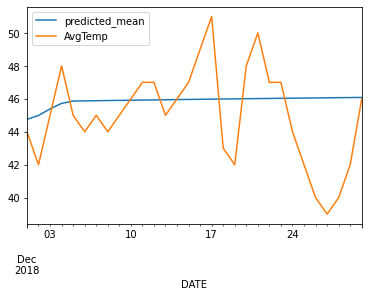

In [21]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [22]:
test['AvgTemp'].mean()

45.0

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463978875173


In [25]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [27]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
pred2=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
pred2.index=index_future_dates
print(pred2)

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249565
2019-01-03    45.116915
2019-01-04    45.136665
2019-01-05    45.156139
2019-01-06    45.175340
2019-01-07    45.194273
2019-01-08    45.212940
2019-01-09    45.231347
2019-01-10    45.249496
2019-01-11    45.267391
2019-01-12    45.285036
2019-01-13    45.302434
2019-01-14    45.319588
2019-01-15    45.336502
2019-01-16    45.353180
2019-01-17    45.369624
2019-01-18    45.385839
2019-01-19    45.401826
2019-01-20    45.417590
2019-01-21    45.433133
2019-01-22    45.448458
2019-01-23    45.463570
2019-01-24    45.478469
2019-01-25    45.493161
2019-01-26    45.507646
2019-01-27    45.521929
2019-01-28    45.536013
2019-01-29    45.549899
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

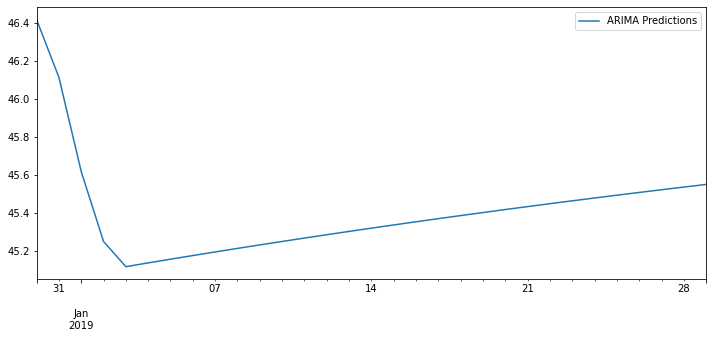

In [28]:
pred2.plot(figsize=(12,5),legend=True)